# 프로젝트 1. 당뇨병 수치 맞추기

## 필요한 모듈 Import 하기

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

plt.style.use('seaborn')
sns.set(font_scale = 2.5)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터셋 가져오기

In [5]:
diabetes = load_diabetes()

## 데이터 확인하기

In [6]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## data를 df_X에, target을 df_y에 넣기

In [7]:
df_X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2','s3','s4','s5','s6']].values
df_y = df['target'].values

## 모델에 입력할 데이터 준비하기

In [8]:
df_X = np.array(df_X)
df_y = np.array(df_y)

## train 데이터와 test 데이터로 분리하기 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)

(353, 10)
(353,)


## 모델 준비하기

In [11]:
W = np.random.rand(10)
b = np.random.rand()

In [12]:
#모델 정의
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

## 손실함수 loss 정의하기

In [13]:
def MSE(a, b):
    mse = ((a-b)**2).mean()
    return mse

In [14]:
def loss(X,W,b,y):
    prediction = model(X, W, b)
    L = MSE(y, prediction)
    return L

## 기울기를 구하는 gradient 함수 구현하기

In [15]:
def gradient(X,W,b,y):
    N = len(X)
    y_pred = model(X,W,b)
    dW = 1/N*2*X.T.dot(y_pred-y)
    db = 2*(y_pred-y).mean()
    return dW, db

## 하이퍼 파라미터인 학습률 설정하기

In [16]:
LEARNING_RATE = 0.9

## 모델 학습하기

In [17]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X, W, b, df_y)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3436.5745
Iteration 200 : Loss 3091.4662
Iteration 300 : Loss 2976.9773
Iteration 400 : Loss 2930.5038
Iteration 500 : Loss 2910.6813
Iteration 600 : Loss 2901.9340
Iteration 700 : Loss 2897.9472
Iteration 800 : Loss 2896.0709
Iteration 900 : Loss 2895.1563
Iteration 1000 : Loss 2894.6889


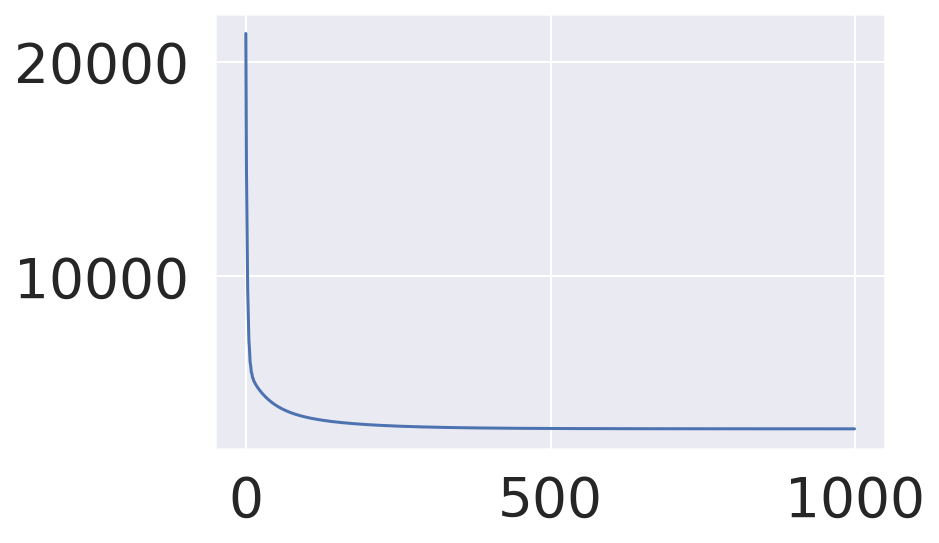

In [18]:
plt.plot(losses)
plt.show()

In [19]:
prediction = model(X_test, W, b)

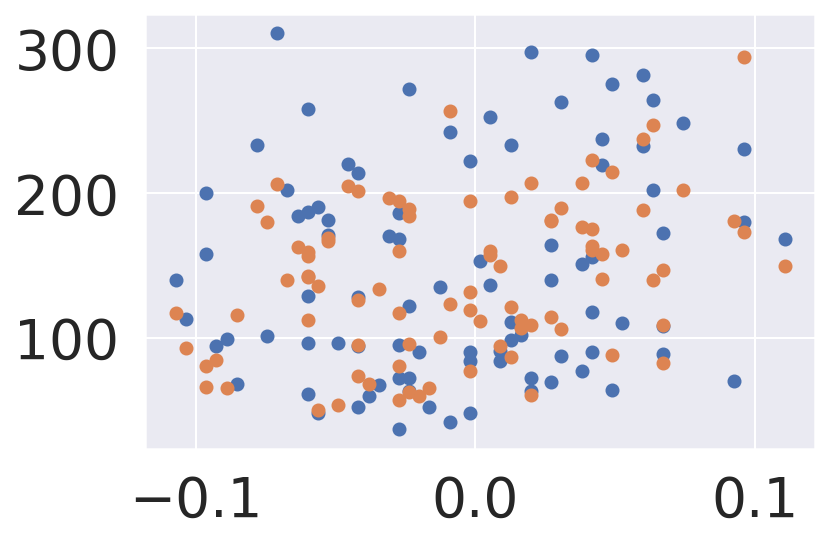

In [20]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [25]:
MSE(y_test, prediction)

2878.6584801787158

# 프로젝트 2. 자전거 타는 사람 몇명?

## 필요한 모듈 Import 하기 

In [91]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

plt.style.use('seaborn')
sns.set(font_scale = 2.5)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 가져오기

In [92]:
os.listdir("../../data")

['img', 'test.csv', 'sampleSubmission.csv', 'train.csv', '.ipynb_checkpoints']

In [93]:
train = pd.read_csv('../../data/train.csv')

In [94]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [95]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [97]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## datetime 컬럼을 datetime 자료형으로 변환하기

In [99]:
# object 타입을 datetime64[ns] 타입으로 바꾼다 
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

train['year']       = train['datetime'].dt.year         # 연(4자리숫자)
train['month']      = train['datetime'].dt.month        # 월(숫자)
train['day']        = train['datetime'].dt.day          # 일(숫자)
train['hour']       = train['datetime'].dt.hour         # 시(숫자)
train['minute']     = train['datetime'].dt.minute       # 분(숫자)
train['second']     = train['datetime'].dt.second       # 초(숫자)

In [100]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## year, month, day, hour, minute, second 데이터 개수 시각화하기

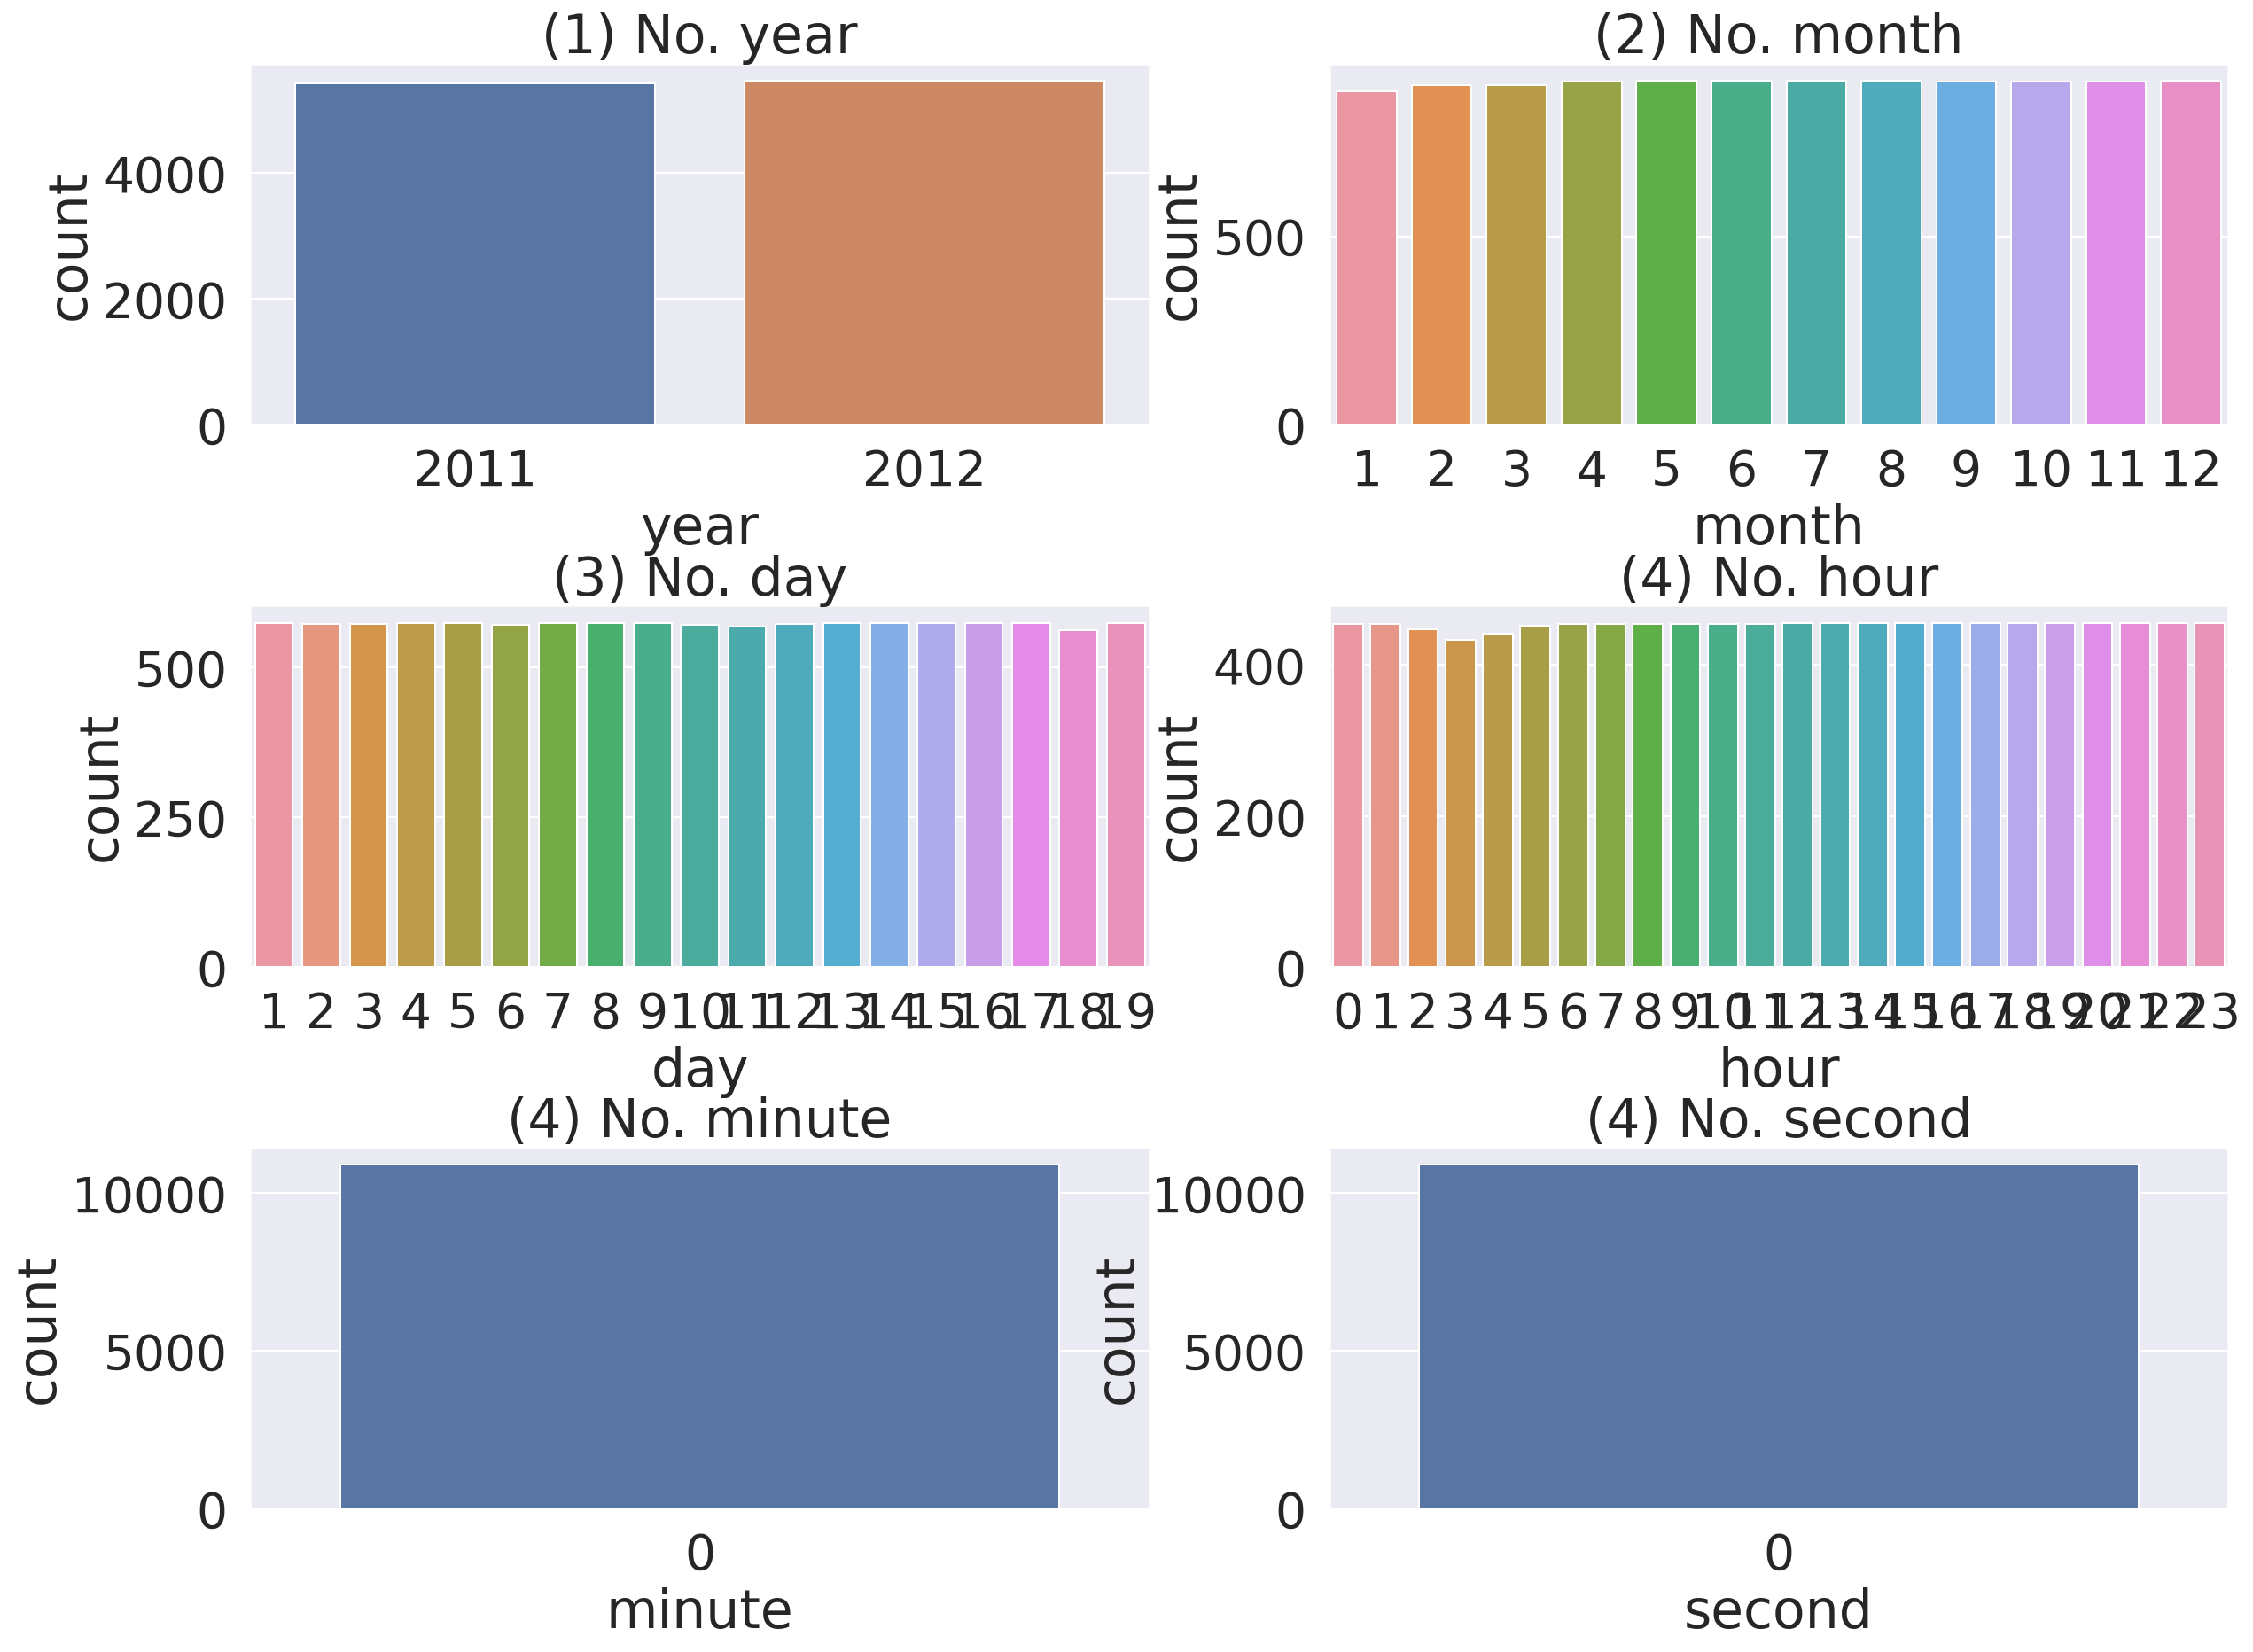

In [101]:
f,ax=plt.subplots(3, 2, figsize=(20,15))
sns.countplot('year', data=train, ax=ax[0,0])
ax[0,0].set_title('(1) No. year')
sns.countplot('month', data=train, ax=ax[0,1])
ax[0,1].set_title('(2) No. month')
sns.countplot('day', data=train, ax=ax[1,0])
ax[1,0].set_title('(3) No. day')
sns.countplot('hour',data=train, ax=ax[1,1])
ax[1,1].set_title('(4) No. hour')
sns.countplot('minute', data=train, ax=ax[2,0])
ax[2,0].set_title('(4) No. minute')
sns.countplot('second', data=train, ax=ax[2,1])
ax[2,1].set_title('(4) No. second')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## X, y 컬럼 선택 및 train/test 데이터 분리

In [103]:
X = train[['year','month','day','hour','season', 'registered',
               'workingday','weather','temp','atemp','humidity',
               'windspeed',]].values
y = train['count'].values

In [104]:
print(X.shape)
print(y.shape)

(10886, 12)
(10886,)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## LinearRegression 모델 학습

In [106]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [107]:
model.fit(X_train, y_train)

LinearRegression()

## 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [108]:
predictions = model.predict(X_test)
predictions

array([521.63064687, 124.62015666, 257.59992565, ...,  47.40541794,
       125.80507143, 301.04731652])

In [109]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)**0.5
print("mse의 값은: ",mse)
print("rmse의 값은: ",rmse)

mse의 값은:  1118.2191265869901
rmse의 값은:  33.4397835906124


## x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

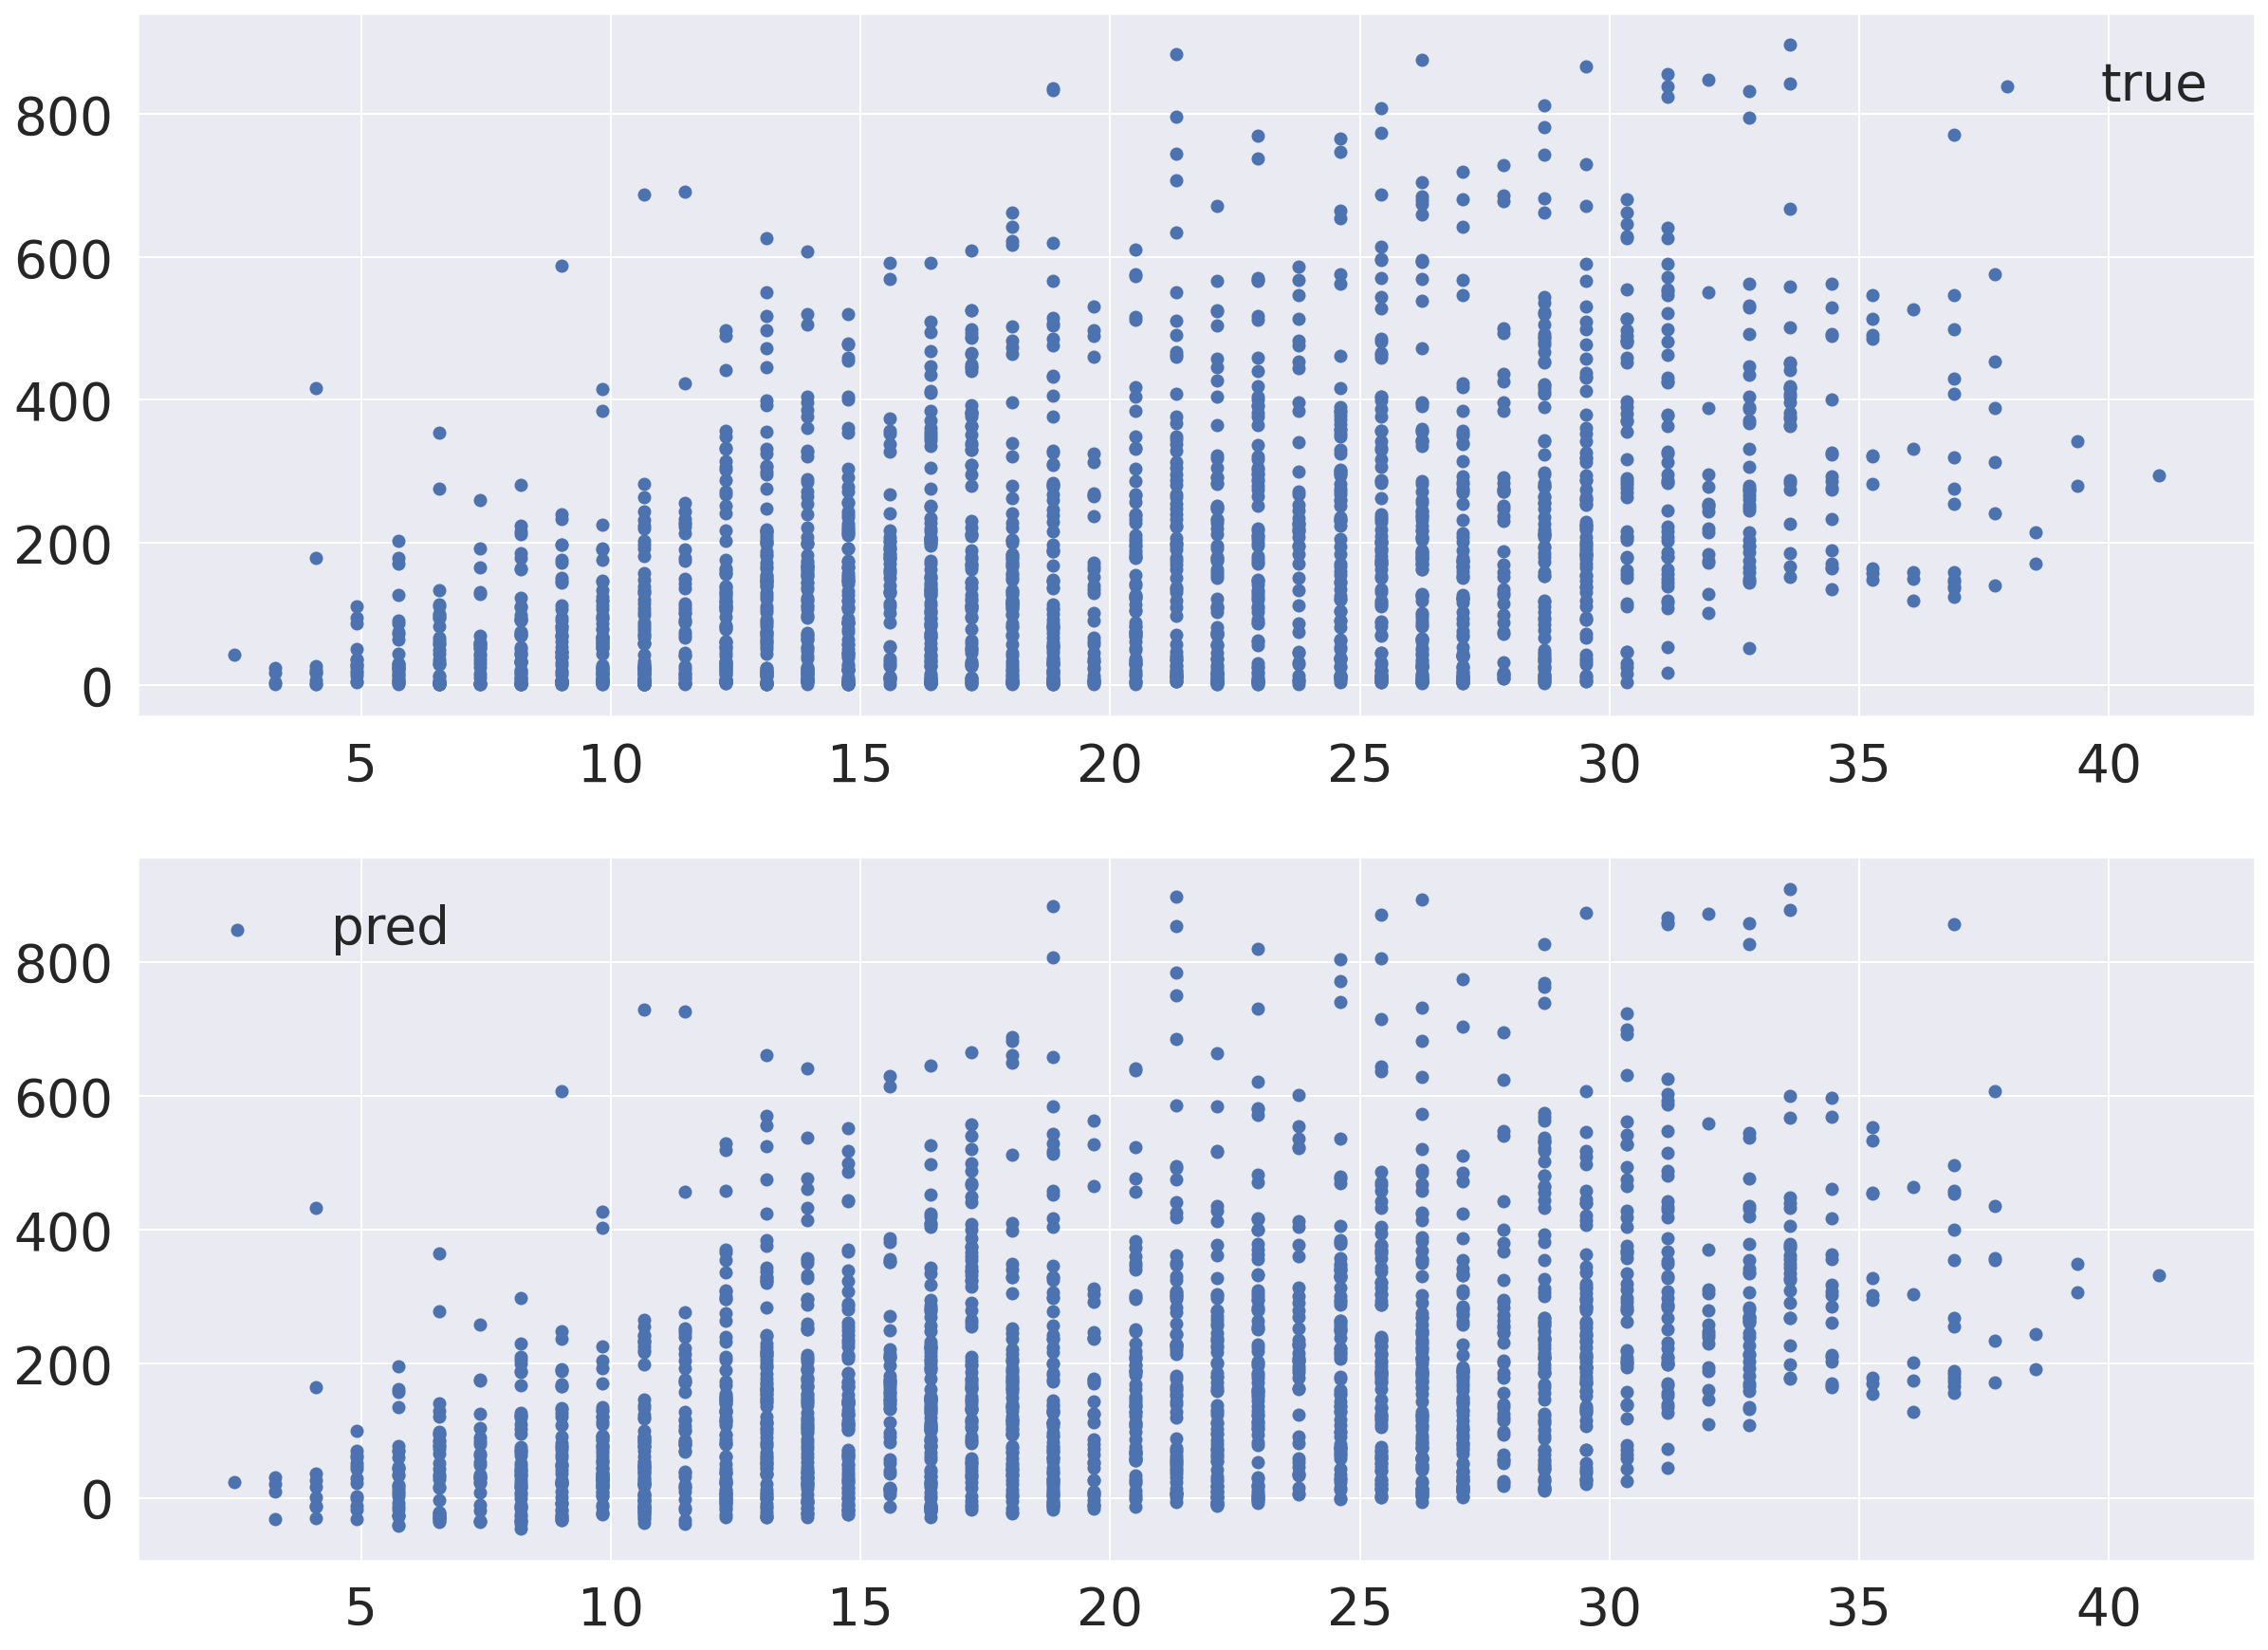

In [110]:
f,ax=plt.subplots(2, 1, figsize=(20,15))
ax[0].scatter(X_test[:, 8], y_test, label="true")
ax[0].legend()
ax[1].scatter(X_test[:, 8], predictions, label="pred")
ax[1].legend()
plt.show()

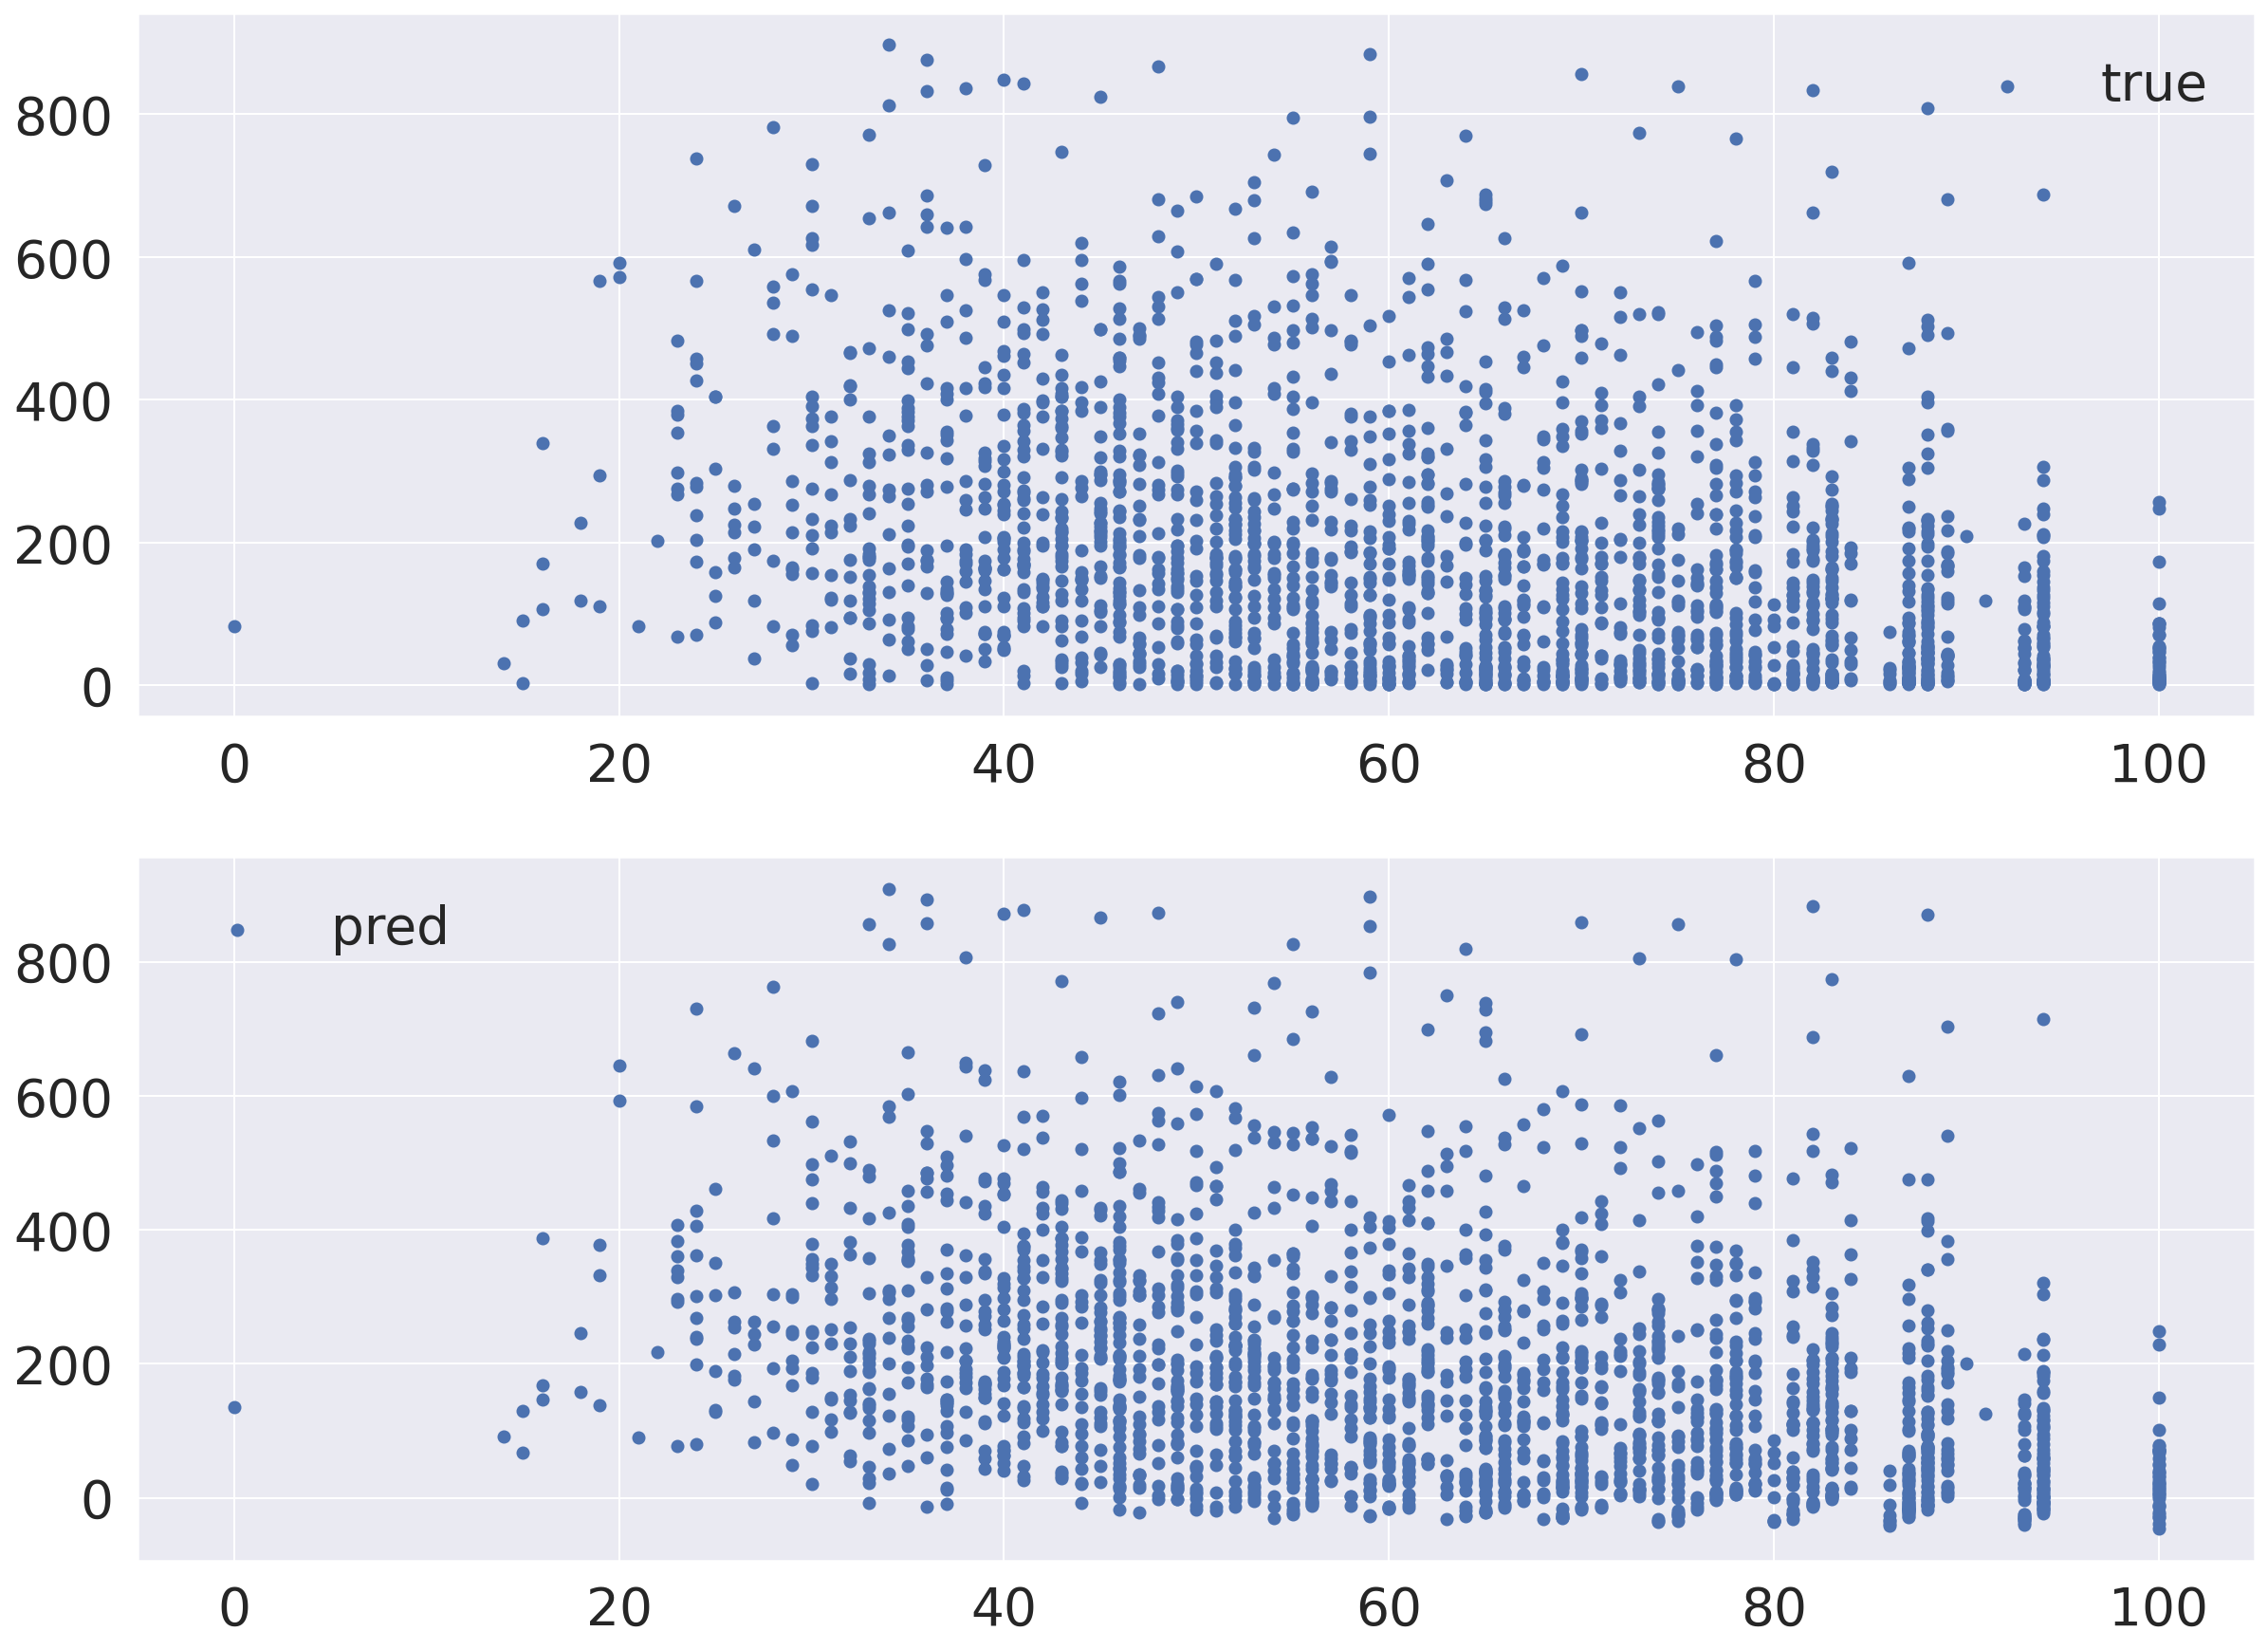

In [111]:
f,ax=plt.subplots(2, 1, figsize=(20,15))
ax[0].scatter(X_test[:, 10], y_test, label="true")
ax[0].legend()
ax[1].scatter(X_test[:, 10], predictions, label="pred")
ax[1].legend()
plt.show()

# 마무리

## X, y 컬럼 선택의 어려움

이번 프로젝트에서는 우수한 모델을 만들기 위한 feature 선택에서 어려움을 겪었다.  
처음 시도는 단순히 분과 초(datetime)를 피처에서 제거했다.  
그랬더니 mse가 거의 e-23 정도로 나왔다.  
처음에는 에러가 거의 없어서 좋아해야되나 싶었지만, 의문이 생겼다.  
오류가 없다고 해서 우수한 모델이 아니라는 사실은 CS231n에서 배웠기 때문이다.  
그래서 X컬럼을 시각화 해서 각 특징들을 파악했다.  
그리고 회원(registered)와 비회원(casual)의 합이 전체 렌탈 수와 같다는 점을 발견했다.  
더해서 결과가 나오는 피쳐는 모델의 예측에 올바른 성능을 가지고 올까?  
결론은 "아니다"였다.  
train data의 회원, 비회원의 수가 13, 5이면 전체 렌탈 수는 18이다.  
그런데 만약 test 데이터에서 회원, 비회원의 렌탈 수가 13, 5라는 숫자가 들어오면,  
단순 계산 만으로도 전체 렌탈 수가 18이라는 사실을 알아챌 수 있다.  
이는 모든 특징을 고려한 "모델"이 아니라 단순한 선형 관계를 나타낸 "함수"에 불과하다.  
이 프로젝트의 문제는 "월요일 오후 세 시, 자전거 타는 사람은 몇 명?"이다.  
이 문제의 본질은 미래 "예측"하는 데 있지, 이미 지나간 데이터를 맞추는 데 목적을 두지 않는다.  
어쨌든 모델이 함수가 되지 않게 주의를 기울였다.  

그리고 공휴일 (holiday)에 대한 피쳐도 제외를 시켰다.   
왜냐하면 데이터가 너무 치중되어있기 때문이다.  
만약 공휴일에 자전거를 탈 확률, 공휴일이 아닌 날에 자전거를 탈 확률을  
피쳐로 두었다면 고려했을 것이다.